In [1]:
import sys
from loguru import logger
import pandas as pd

from src.balance import Balance
from src.cashflow import CashFlow
from src.simulation import Simulation
from src.variables import ENTITIES, ASSETS_LIAIBILITIES

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
logger.remove()
logger.add(sys.stderr, 
           format='|{level: <1}|  <level>{message}</level>',
           level="INFO")

1

In [4]:

# CASHFLOW
cashflow = CashFlow()
for entity in ENTITIES+ASSETS_LIAIBILITIES:
    cashflow.add_entity(entity)
    
# BALANCE
balance = Balance()
for entity in ASSETS_LIAIBILITIES:
    balance.add_entity(entity)
    
simulation = Simulation(start_date='2023-11-01', 
                        duration=12*30,
                        cashflow=cashflow, 
                        balance=balance)
simulation.run()

|INFO|  Total cashflow: $9,579 


|INFO|  Total net worth: $ 662,829 


|INFO|  Total cashflow: $-220,248 


|INFO|  Total net worth: $ 642,581 


|INFO|  Total cashflow: $3,691 


|INFO|  Total net worth: $ 650,328 


|INFO|  Total cashflow: $3,727 


|INFO|  Total net worth: $ 658,127 


|INFO|  Total cashflow: $3,764 


|INFO|  Total net worth: $ 665,977 


|INFO|  Total cashflow: $3,801 


|INFO|  Total net worth: $ 673,880 


|INFO|  Total cashflow: $3,838 


|INFO|  Total net worth: $ 681,836 


|INFO|  Total cashflow: $3,876 


|INFO|  Total net worth: $ 689,844 


|INFO|  Total cashflow: $3,913 


|INFO|  Total net worth: $ 697,904 


|INFO|  Total cashflow: $3,950 


|INFO|  Total net worth: $ 706,017 


|INFO|  Total cashflow: $3,988 


|INFO|  Total net worth: $ 714,183 


|INFO|  Total cashflow: $-20,320 


|INFO|  Total net worth: $ 708,057 


|INFO|  Total cashflow: $-228,886 


|INFO|  Total net worth: $ 683,589 


|INFO|  Total cashflow: $-1,252 


|INFO|  Total net wor

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Your JSON data
data = simulation.get_results()

# Convert to DataFrame
cashflow_data = {}
net_worth_data = {}

for date, info in data.items():
    cashflow_data[date] = info['cashflow']
    net_worth_data[date] = info['net_worth']

cashflow_df = pd.DataFrame(cashflow_data).T
net_worth_df = pd.DataFrame(net_worth_data).T

# Convert index to datetime
cashflow_df.index = pd.to_datetime(cashflow_df.index)
net_worth_df.index = pd.to_datetime(net_worth_df.index)

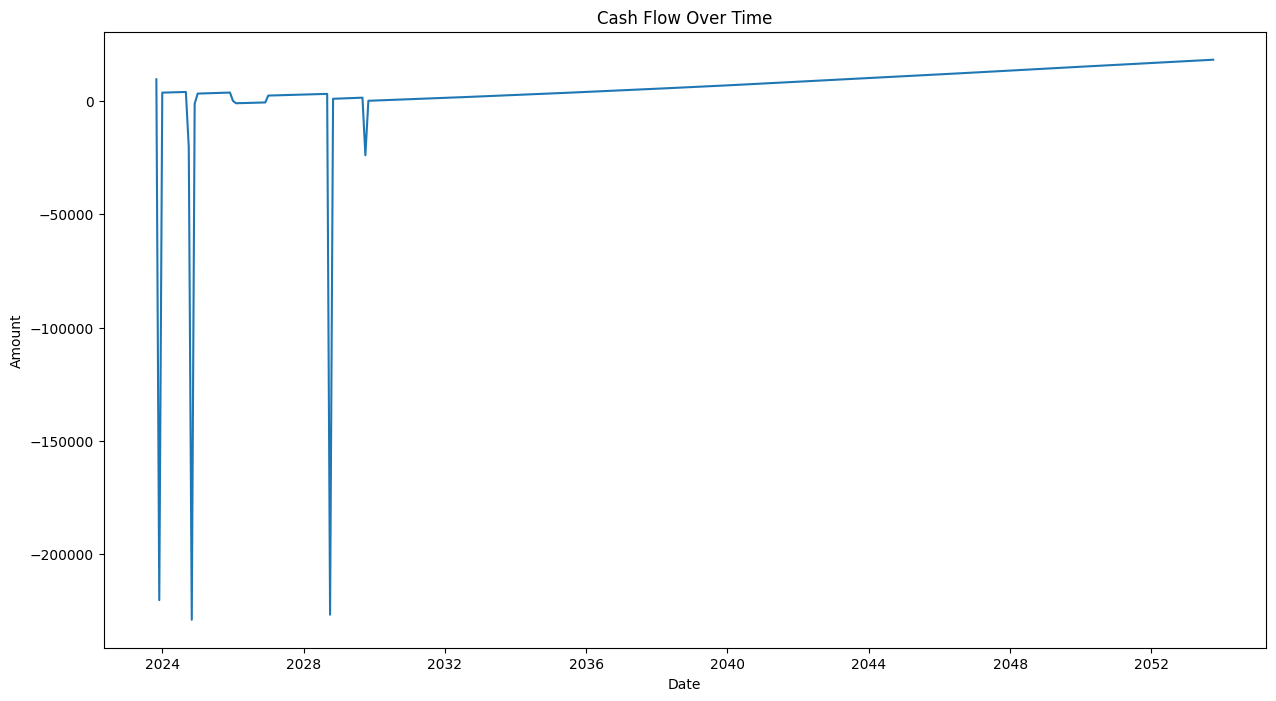

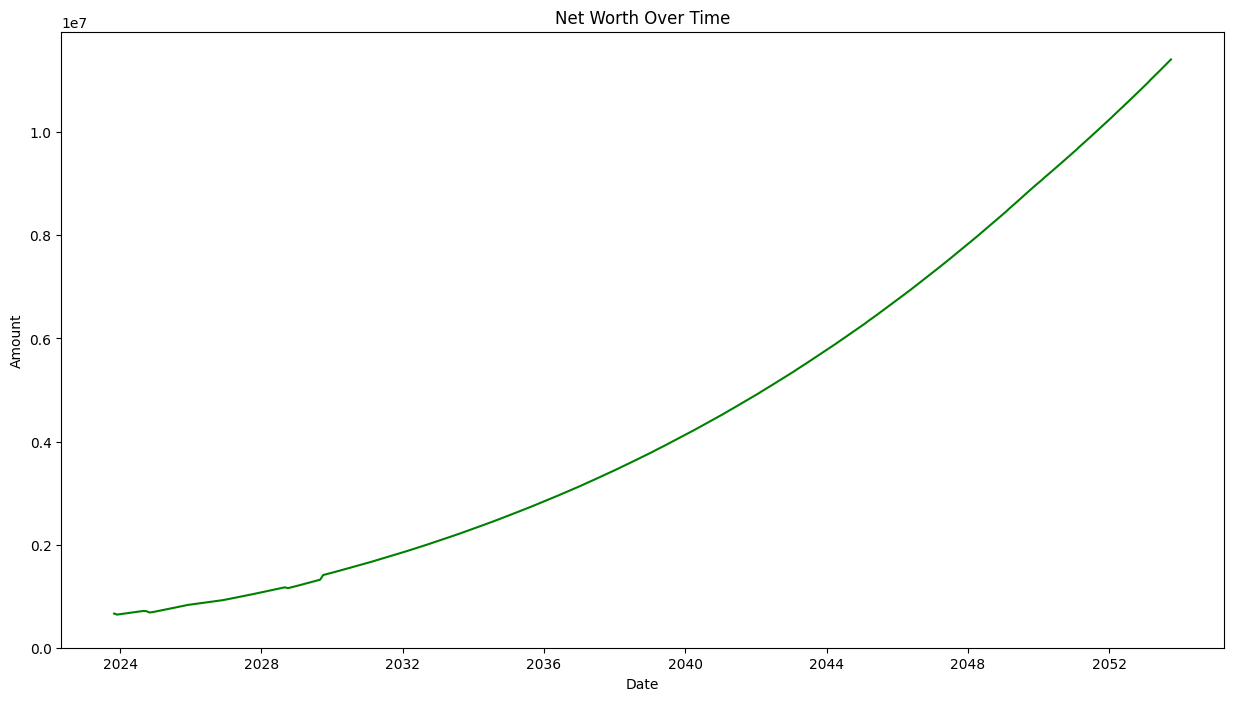

In [6]:
cashflow_df['Total Cash Flow'] = cashflow_df.sum(axis=1)
net_worth_df['Total Net Worth'] = net_worth_df.sum(axis=1)

# Plot Cash Flow Data
plt.figure(figsize=(15, 8))
plt.plot(cashflow_df.index, cashflow_df['Total Cash Flow'], label='Total Cash Flow')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Cash Flow Over Time');

# Plot Net Worth Data
plt.figure(figsize=(15, 8))
plt.plot(net_worth_df.index, net_worth_df['Total Net Worth'], label='Total Net Worth', color='green')
plt.ylim(bottom=0)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Net Worth Over Time');

In [10]:
#cashflow_df
# style columns for $ 
cashflow_df.style.format("$ {:,.0f}")

,Salary Simon,Side Simon,Salary Lolo,Side Lolo,Maternity Lolo,Maternity Lolo2,Rent,Amenities,Transport,Entertainment,travelling,Food,Other,Baby,Baby2,Bank Account,House,Triplex,Triplex2,Cottage,Cottage Land,Total Cash Flow
2023-11-01 00:00:00,"$ 8,027",$ 502,"$ 6,020",$ 502,$ 0,$ 0,"$ -1,406",$ -602,$ -504,$ -652,"$ -1,003",$ -803,$ -501,$ 0,$ 0,$ 0,$ 0,$ 0,$ 0,$ 0,$ 0,"$ 9,579"
2023-12-01 00:00:00,"$ 8,053",$ 503,"$ 6,040",$ 503,$ 0,$ 0,"$ -1,412",$ -604,$ -508,$ -654,"$ -1,007",$ -805,$ -502,$ 0,$ 0,$ 0,$ 0,"$ -229,857",$ 0,$ 0,$ 0,"$ -220,248"
2024-01-01 00:00:00,"$ 8,080",$ 505,"$ 6,060",$ 505,"$ -3,000",$ 0,"$ -1,418",$ -606,$ -513,$ -657,"$ -1,010",$ -808,$ -503,$ -700,$ 0,$ 0,$ 0,"$ -2,247",$ 0,$ 0,$ 0,"$ 3,691"
2024-02-01 00:00:00,"$ 8,107",$ 507,"$ 6,080",$ 507,"$ -3,000",$ 0,"$ -1,423",$ -608,$ -517,$ -659,"$ -1,013",$ -811,$ -503,$ -702,$ 0,$ 0,$ 0,"$ -2,237",$ 0,$ 0,$ 0,"$ 3,727"
2024-03-01 00:00:00,"$ 8,134",$ 508,"$ 6,101",$ 508,"$ -3,000",$ 0,"$ -1,429",$ -610,$ -521,$ -661,"$ -1,017",$ -813,$ -504,$ -705,$ 0,$ 0,$ 0,"$ -2,227",$ 0,$ 0,$ 0,"$ 3,764"
2024-04-01 00:00:00,"$ 8,161",$ 510,"$ 6,121",$ 510,"$ -3,000",$ 0,"$ -1,435",$ -612,$ -526,$ -663,"$ -1,020",$ -816,$ -505,$ -707,$ 0,$ 0,$ 0,"$ -2,217",$ 0,$ 0,$ 0,"$ 3,801"
2024-05-01 00:00:00,"$ 8,189",$ 512,"$ 6,141",$ 512,"$ -3,000",$ 0,"$ -1,441",$ -614,$ -530,$ -665,"$ -1,024",$ -819,$ -506,$ -709,$ 0,$ 0,$ 0,"$ -2,207",$ 0,$ 0,$ 0,"$ 3,838"
2024-06-01 00:00:00,"$ 8,216",$ 513,"$ 6,162",$ 513,"$ -3,000",$ 0,"$ -1,447",$ -616,$ -534,$ -668,"$ -1,027",$ -822,$ -507,$ -712,$ 0,$ 0,$ 0,"$ -2,197",$ 0,$ 0,$ 0,"$ 3,876"
2024-07-01 00:00:00,"$ 8,243",$ 515,"$ 6,182",$ 515,"$ -3,000",$ 0,"$ -1,453",$ -618,$ -539,$ -670,"$ -1,030",$ -824,$ -508,$ -714,$ 0,$ 0,$ 0,"$ -2,187",$ 0,$ 0,$ 0,"$ 3,913"
2024-08-01 00:00:00,"$ 8,271",$ 517,"$ 6,203",$ 517,"$ -3,000",$ 0,"$ -1,459",$ -620,$ -543,$ -672,"$ -1,034",$ -827,$ -508,$ -716,$ 0,$ 0,$ 0,"$ -2,177",$ 0,$ 0,$ 0,"$ 3,950"


In [12]:
net_worth_df.style.format("$ {:,.0f}")

,Bank Account,House,Triplex,Triplex2,Cottage,Cottage Land,Total Net Worth
2023-11-01 00:00:00,"$ 662,829",$ 0,$ 0,$ 0,$ 0,$ 0,"$ 662,829"
2023-12-01 00:00:00,"$ 442,581",$ 0,"$ 200,000",$ 0,$ 0,$ 0,"$ 642,581"
2024-01-01 00:00:00,"$ 446,271",$ 0,"$ 204,057",$ 0,$ 0,$ 0,"$ 650,328"
2024-02-01 00:00:00,"$ 449,998",$ 0,"$ 208,128",$ 0,$ 0,$ 0,"$ 658,127"
2024-03-01 00:00:00,"$ 453,763",$ 0,"$ 212,215",$ 0,$ 0,$ 0,"$ 665,977"
2024-04-01 00:00:00,"$ 457,564",$ 0,"$ 216,317",$ 0,$ 0,$ 0,"$ 673,880"
2024-05-01 00:00:00,"$ 461,402",$ 0,"$ 220,434",$ 0,$ 0,$ 0,"$ 681,836"
2024-06-01 00:00:00,"$ 465,278",$ 0,"$ 224,566",$ 0,$ 0,$ 0,"$ 689,844"
2024-07-01 00:00:00,"$ 469,190",$ 0,"$ 228,713",$ 0,$ 0,$ 0,"$ 697,904"
2024-08-01 00:00:00,"$ 473,141",$ 0,"$ 232,876",$ 0,$ 0,$ 0,"$ 706,017"


<Axes: >

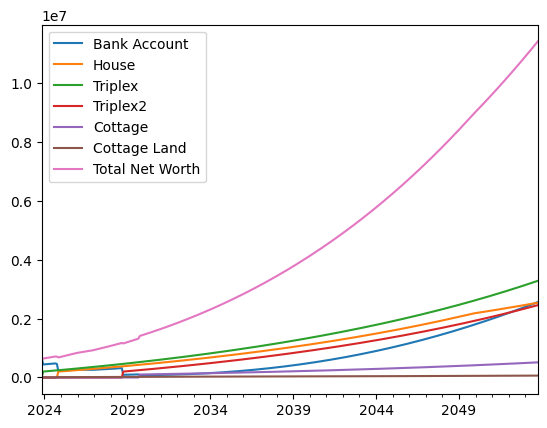

In [13]:
net_worth_df.plot()